In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TEST SET

In [29]:
data = pd.read_csv('/home/bvelasco/Hydranet_script/Results/Results_CI/ihdp/ihdp_3/results_test.csv')

In [30]:
# Handle data and obtain results
data.N = data.N # N is the size of the test set, we change it to the whole size of the dataset (ratio 0.2)

In [31]:
# Naive error
naive_err = data['Naive estimator error']

In [32]:
# Get baseline error
baseline_err = data['baseline'].apply(lambda x: pd.to_numeric(x.split()[-1].strip('}')))

In [33]:
# Even more complicated preprocessing
# Get t_reg error
treg_err = data['targeted_regularization'].apply(lambda x: pd.to_numeric(x.split()[-1].strip('}')))

In [34]:
naive_CIs = data['Naive est error CIs'].apply(lambda x: pd.to_numeric(x.strip('()').split(',')))
baseline_CIs = data['baseline est error CIs'].apply(lambda x: pd.to_numeric(x.strip('()').split(',')))
treg_CIs = data['targeted_regularization est error CIs'].apply(lambda x: pd.to_numeric(x.strip('()').split(',')))

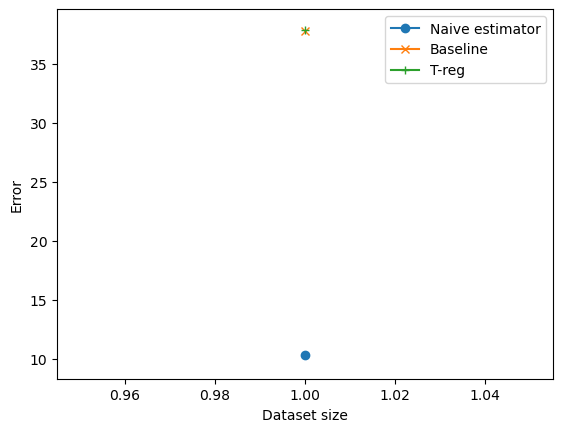

In [40]:
# Print naive, baseline, treg errors wrt N
fig, ax = plt.subplots()

ax.plot(data.N, naive_err, marker='o');
ax.plot(data.N, baseline_err, marker='x');
ax.plot(data.N, treg_err, marker='+');

plt.legend(['Naive estimator', 'Baseline', 'T-reg'])

ax.fill_between(data.N, naive_CIs.apply(lambda x: x[0]).values, naive_CIs.apply(lambda x: x[1]).values, alpha=.5)
ax.fill_between(data.N, baseline_CIs.apply(lambda x: x[0]).values, baseline_CIs.apply(lambda x: x[1]).values, alpha=.5)
ax.fill_between(data.N, treg_CIs.apply(lambda x: x[0]).values, treg_CIs.apply(lambda x: x[1]).values, alpha=.5)

plt.xlabel('Dataset size');
plt.ylabel('Error');
fig.savefig('3_abs_test.pdf')

In [11]:
# Compute size of error wrt. size of effect, in %
# Compute true value
true_val = data['Avg true value'].apply(lambda x: [pd.to_numeric(x.split()[0].strip('[')), pd.to_numeric(x.split()[1].strip(']'))] )
true_val_1 = true_val.apply(lambda x: abs(x[0])+abs(x[1]))

In [12]:
naive_perc = naive_err/true_val_1*100
naive_CI_perc = naive_CIs/true_val_1*100

baseline_perc = baseline_err/true_val_1*100
baseline_CI_perc = baseline_CIs/true_val_1*100

treg_perc = treg_err/true_val_1*100
treg_CI_perc = treg_CIs/true_val_1*100

In [13]:
# Extra axis, same figure
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
#ax2.plot(data.N, naive_perc, marker='o')
#ax2.plot(data.N, baseline_perc, marker='o')
#ax2.plot(data.N, treg_perc, marker='o')
#ax2.legend(['Naive estimator', 'Baseline', 'T-reg'])
#plt.xlabel('Dataset size');
#ax2.set_ylabel('% of error w.r.t. effect size')
#fig.show()
#fig.savefig('3_test_combined.pdf')
# savethe plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')


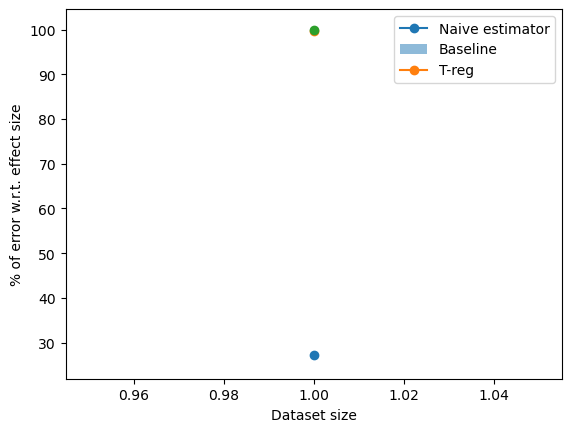

In [14]:
# Print naive, baseline, treg errors wrt N
fig, ax = plt.subplots()

ax.plot(data.N, naive_perc, marker='o');
ax.fill_between(data.N, naive_CI_perc.apply(lambda x: x[0]).values, naive_CI_perc.apply(lambda x: x[1]).values, alpha=.5)

ax.plot(data.N, baseline_perc, marker='o');
ax.fill_between(data.N, baseline_CI_perc.apply(lambda x: x[0]).values, baseline_CI_perc.apply(lambda x: x[1]).values, alpha=.5)

ax.plot(data.N, treg_perc, marker='o');
ax.fill_between(data.N, treg_CI_perc.apply(lambda x: x[0]).values, treg_CI_perc.apply(lambda x: x[1]).values, alpha=.5)

#plt.plot(data.N, naive_perc, marker='o');
#plt.plot(data.N, baseline_perc, marker='o');
#plt.plot(data.N, treg_perc, marker='o');
plt.legend(['Naive estimator', 'Baseline', 'T-reg'])
plt.xlabel('Dataset size');
plt.ylabel('% of error w.r.t. effect size');
plt.savefig('3_perc_test.pdf')

In [15]:
# Extra axis, same figure
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax2.plot(data.N, naive_perc, marker='o')
ax.fill_between(data.N, naive_CI_perc.apply(lambda x: x[0]).values, naive_CI_perc.apply(lambda x: x[1]).values, alpha=.5)

ax2.plot(data.N, baseline_perc, marker='o')
ax.fill_between(data.N, baseline_CI_perc.apply(lambda x: x[0]).values, baseline_CI_perc.apply(lambda x: x[1]).values, alpha=.5)

ax2.plot(data.N, treg_perc, marker='o')
ax.fill_between(data.N, treg_CI_perc.apply(lambda x: x[0]).values, treg_CI_perc.apply(lambda x: x[1]).values, alpha=.5)

#ax2.legend(['Naive estimator', 'Baseline', 'T-reg'])
#plt.xlabel('Dataset size');
ax2.set_ylabel('% of error w.r.t. effect size')
fig.show()
#fig.savefig('3_test_combined.pdf')
# savethe plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')


In [16]:
summary = pd.concat([data.N, true_val_1, naive_err, naive_perc, baseline_err, baseline_perc, treg_err, treg_perc],axis=1)
summary.columns = ['Data size','Size of true effect', 'Size naive error', '% naive error', 'Size baseline error', '% baseline error', 'Size t-reg error', '% t-reg error']

In [17]:
#summary.to_csv('processed_results.csv')
print(summary.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Data size &  Size of true effect &  Size naive error &  \% naive error &  Size baseline error &  \% baseline error &  Size t-reg error &  \% t-reg error \\
\midrule
0 &          1 &                37.89 &             10.36 &          27.34 &                37.75 &             99.62 &             37.84 &          99.87 \\
\bottomrule
\end{tabular}



# TRAIN SET

In [18]:
data = pd.read_csv('/home/bvelasco/Hydranet_script/Results/Results_CI/ihdp/ihdp_3/results_train.csv')

In [19]:
# Handle data and obtain results
data.N = data.N/0.2 # N is the size of the test set, we change it to the whole size of the dataset (ratio 0.2)

In [20]:
# Naive error
naive_err = data['Naive estimator error']

In [21]:
# Get baseline error
baseline_err = data['baseline'].apply(lambda x: pd.to_numeric(x.split()[-1].strip('}')))

In [22]:
# Even more complicated preprocessing
# Get t_reg error
treg_err = data['targeted_regularization'].apply(lambda x: pd.to_numeric(x.split()[-1].strip('}')))

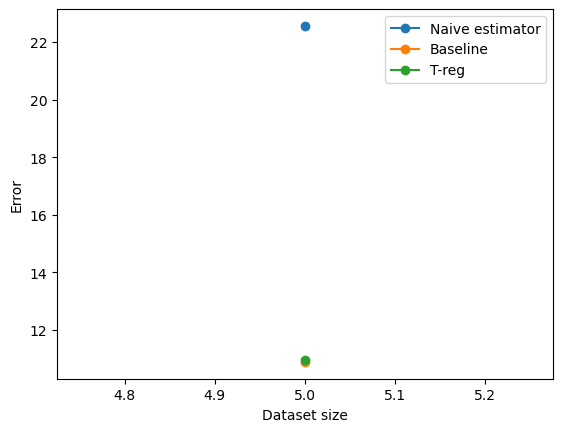

In [23]:
# Print naive, baseline, treg errors wrt N
plt.plot(data.N, naive_err, marker='o');
plt.plot(data.N, baseline_err, marker='o');
plt.plot(data.N, treg_err, marker='o');
plt.legend(['Naive estimator', 'Baseline', 'T-reg'])
plt.xlabel('Dataset size');
plt.ylabel('Error');
plt.savefig('3_abs_train.pdf')

In [24]:
# Compute size of error wrt. size of effect, in %
# Compute true value
true_val = data['Avg true value'].apply(lambda x: [pd.to_numeric(x.split()[1].strip('[')), pd.to_numeric(x.split()[2].strip(']'))] )
true_val_1 = true_val.apply(lambda x: abs(x[0])+abs(x[1]))

In [25]:
naive_perc = naive_err/true_val_1*100
baseline_perc = baseline_err/true_val_1*100
treg_perc = treg_err/true_val_1*100

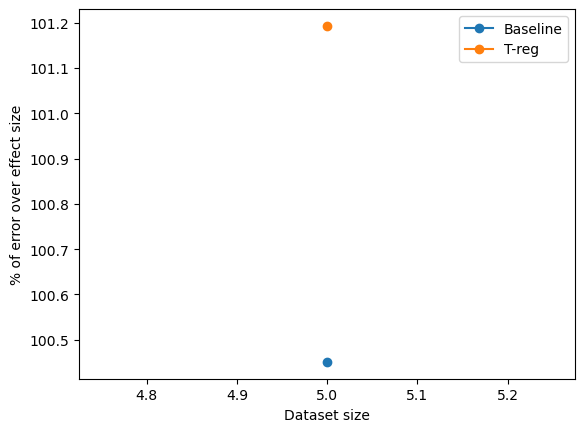

In [26]:
# Plot percentage error
plt.plot(data.N,baseline_perc, marker='o')
plt.plot(data.N,treg_perc, marker='o')
plt.legend(['Baseline', 'T-reg'])
plt.xlabel('Dataset size');
plt.ylabel('% of error over effect size');
plt.savefig('3_perc_train.pdf')

In [27]:
summary = pd.concat([data.N, true_val_1, naive_err, naive_perc, baseline_err, baseline_perc, treg_err, treg_perc],axis=1)
summary.columns = ['Data size','Size of true effect', 'Size naive error', '% naive error', 'Size baseline error', '% baseline error', 'Size t-reg error', '% t-reg error']

In [28]:
#summary.to_csv('processed_results.csv')
print(summary.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Data size &  Size of true effect &  Size naive error &  \% naive error &  Size baseline error &  \% baseline error &  Size t-reg error &  \% t-reg error \\
\midrule
0 &       5.00 &                10.85 &             22.55 &         207.93 &                10.90 &            100.45 &             10.98 &         101.19 \\
\bottomrule
\end{tabular}

